In [1]:
import pandas as pd
import numpy as np
import scipy
from TrainPredict import TrainPredict
from xgboost import plot_tree


In [2]:
# Create simple dataframe
data = { 'country': ['Germany','Germany','Germany','Germany','Germany', 'Germany',
                     'US', 'US', 'US', 'US', 'US',
                     'UK', 'UK', 'UK', 'UK', 'UK', 
                     'LUX','LUX','LUX','LUX','LUX'],
         'currency':['EUR','EUR','EUR','EUR','EUR','MXN',
                     'USD','USD','USD','USD','USD',
                     'GBP','GBP','GBP','GBP','GBP',
                     'EUR','EUR','EUR','EUR','EUR'],
         'manyvalues':['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E', 'E', 'E', 'K', 'L', 'M', 'N', 'O',
                      'Z', 'Z', 'Z', 'Z', 'Y']}
   

frame = pd.DataFrame(data)
print(frame)

    country currency manyvalues
0   Germany      EUR          A
1   Germany      EUR          A
2   Germany      EUR          B
3   Germany      EUR          B
4   Germany      EUR          C
5   Germany      MXN          C
6        US      USD          D
7        US      USD          D
8        US      USD          E
9        US      USD          E
10       US      USD          E
11       UK      GBP          K
12       UK      GBP          L
13       UK      GBP          M
14       UK      GBP          N
15       UK      GBP          O
16      LUX      EUR          Z
17      LUX      EUR          Z
18      LUX      EUR          Z
19      LUX      EUR          Z
20      LUX      EUR          Y


In [3]:
tp = TrainPredict()


In [4]:
print(tp.converteddf)

None


In [5]:
##### Means predictions
print(tp.Predict(frame)[0])
# Standard errors in predictions
print(tp.Predict(frame)[1])

column country_0: created binary classifier
column country_1: created binary classifier
column country_2: created binary classifier
column country_3: created binary classifier
column currency_0: created binary classifier
column currency_1: created binary classifier
column currency_2: created binary classifier
column currency_3: created binary classifier
column manyvalues: created multiclass classifier
building model for column country_0 type onehot
building model for column country_1 type onehot
building model for column country_2 type onehot


C:\Users\will\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


building model for column country_3 type onehot
building model for column currency_0 type onehot
building model for column currency_1 type onehot
building model for column currency_2 type onehot
building model for column currency_3 type onehot
building model for column manyvalues type labelencoded
building model for column country_0 type onehot
building model for column country_1 type onehot
building model for column country_2 type onehot
building model for column country_3 type onehot
building model for column currency_0 type onehot
building model for column currency_1 type onehot
building model for column currency_2 type onehot
building model for column currency_3 type onehot
building model for column manyvalues type labelencoded
building model for column country_0 type onehot
building model for column country_1 type onehot
building model for column country_2 type onehot
building model for column country_3 type onehot
building model for column currency_0 type onehot
building model fo

In [6]:
boolerrors = tp.SpotErrors(frame)
print(boolerrors)

    country_0  country_1  country_2  country_3  currency_0  currency_1  \
0       False      False      False      False       False       False   
1       False      False      False      False       False       False   
2       False      False      False      False       False       False   
3       False      False      False      False       False       False   
4       False      False      False      False       False       False   
5       False      False      False      False        True       False   
6       False      False      False      False       False       False   
7       False      False      False      False       False       False   
8       False      False      False      False       False       False   
9       False      False      False      False       False       False   
10      False      False      False      False       False       False   
11      False      False      False      False       False        True   
12      False      False      False   

In [7]:
print(tp.PrintErrors(frame))

row 5 column currency: actual=MXN predicted=EUR
row 6 column currency: actual=USD predicted=(no clear prediction)
row 7 column currency: actual=USD predicted=(no clear prediction)
row 11 column currency: actual=GBP predicted=(no clear prediction)
row 13 column currency: actual=GBP predicted=(no clear prediction)
row 14 column currency: actual=GBP predicted=(no clear prediction)
row 15 column currency: actual=GBP predicted=EUR
row 20 column manyvalues: actual=Y predicted=Z
None


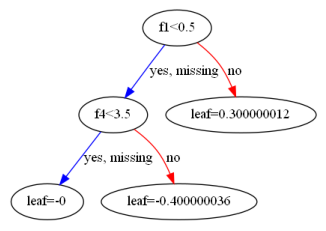

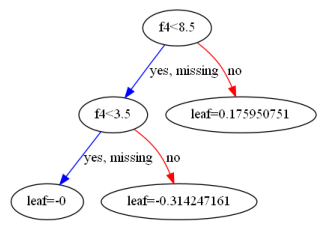

In [8]:
model = tp.models['currency_0'][0]
for i in range(2):
    plot_tree(model, num_trees=i)